# SFTF, para señal 

In [1]:
#libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from scipy.fft import fft, fftfreq, fftshift
from scipy.signal import stft, istft

sn.set_style('darkgrid')
np.random.seed(27) #98 good number too 

In [13]:
Fs = 100
duration = 1000
omega1 = 1
omega2 = 5
N = int(duration * Fs)
t = np.arange(N) / Fs
t1 = t[:N//2]
t2 = t[N//2:]

x1 = 1.0 * np.sin(2 * np.pi * omega1 * t1)
x2 = 0.7 * np.sin(2 * np.pi * omega2 * t2)
x = np.concatenate((x1, x2))

In [5]:
#data, generación de señal de prueba

def signal(x): 
    y = 0
    result = []
    for _ in x:
        result.append(y)
        y = y + np.random.normal(scale=1)
    return np.array(result)

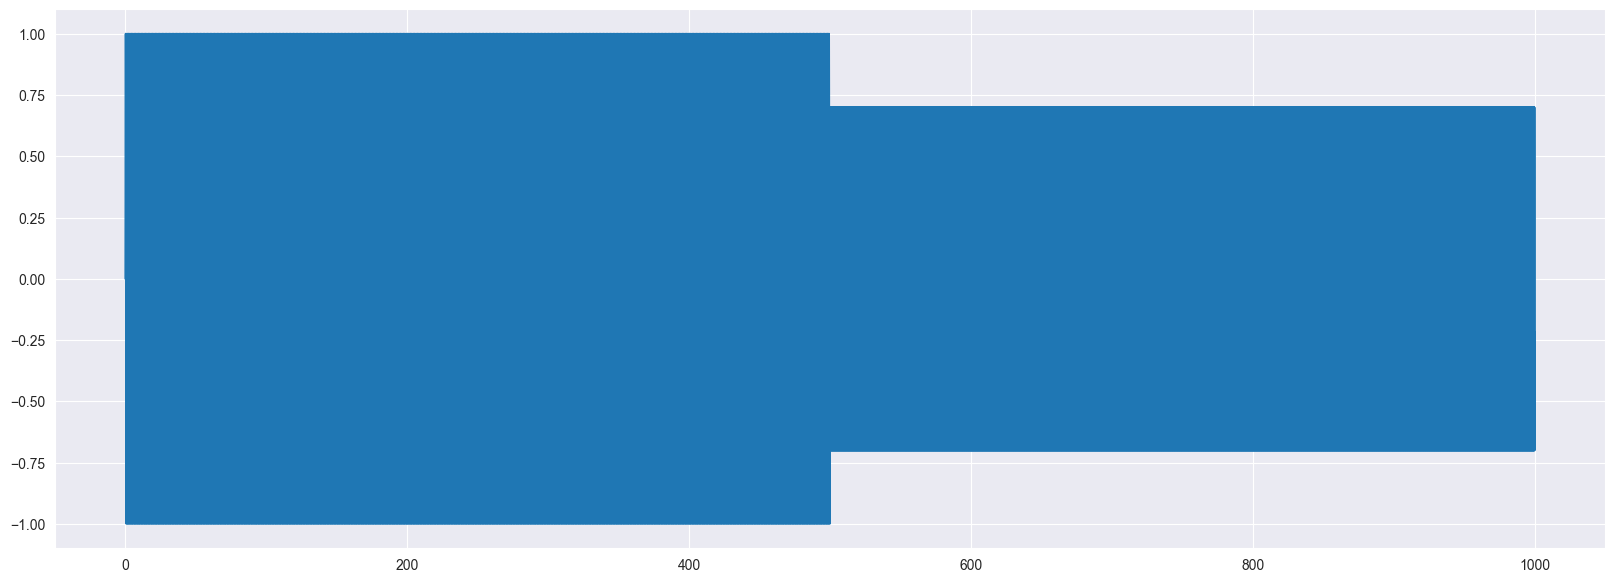

In [21]:
#t = np.linspace(0, len(t), 1000)
#y = signal(x)

plt.figure(figsize=(20, 7))
plt.plot(t, x)
plt.show/()
#plt.plot(t[N//4:N//3], x[N//4:N//3])

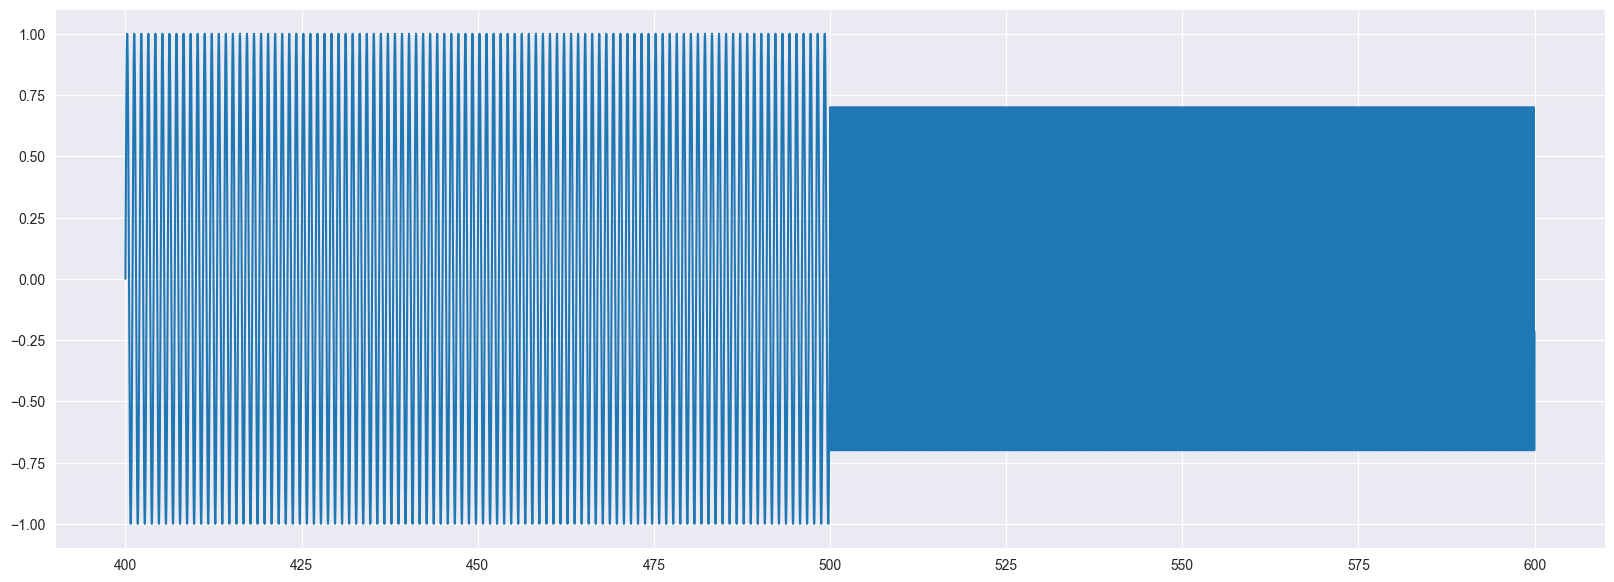

In [25]:
plt.figure(figsize=(20, 7))
plt.plot(t[40000:60000], x[40000:60000])
plt.show()

### STFT, ventanas entre .1 y 1 segundo.

In [41]:
f,t,z = stft(x, fs = 10000, nperseg= 100, noverlap = 100//8, scaling='psd', detrend='linear',return_onesided=True)

In [42]:
f

array([   0.,  100.,  200.,  300.,  400.,  500.,  600.,  700.,  800.,
        900., 1000., 1100., 1200., 1300., 1400., 1500., 1600., 1700.,
       1800., 1900., 2000., 2100., 2200., 2300., 2400., 2500., 2600.,
       2700., 2800., 2900., 3000., 3100., 3200., 3300., 3400., 3500.,
       3600., 3700., 3800., 3900., 4000., 4100., 4200., 4300., 4400.,
       4500., 4600., 4700., 4800., 4900., 5000.])

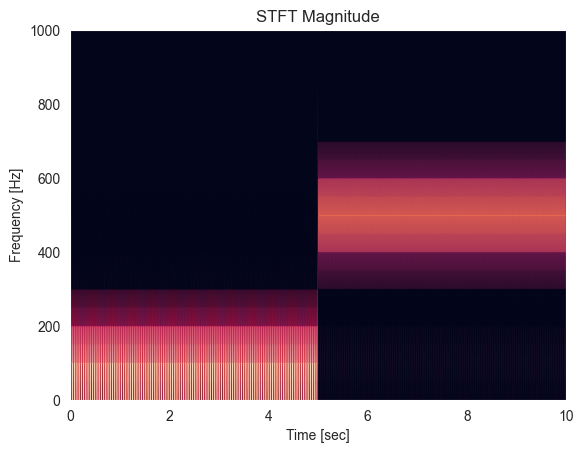

In [27]:
# stft de la señal con todas sus ventanas.
plt.pcolormesh(t, f, np.abs(z), vmin=0, shading='gouraud')
plt.ylim([0, 1000])
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

###  

Con STFT se tienen todas las ventanas de la señal , donde t es el tiempo de la ventana, F arreglo de las frecuencias y Z la trasformada de fourieri.

fs  =   sampling frequency

nperseg   = largo o tamaño de la ventana

noverlap  = cantidad de puntos que se traslapan entre ventanas (utilizo nperseg//8)

scaling   = psd, power spectral density. Densidad de potencia espectral. Permite calcular la energia de la señal integrand sobre el absoluto(z)**2


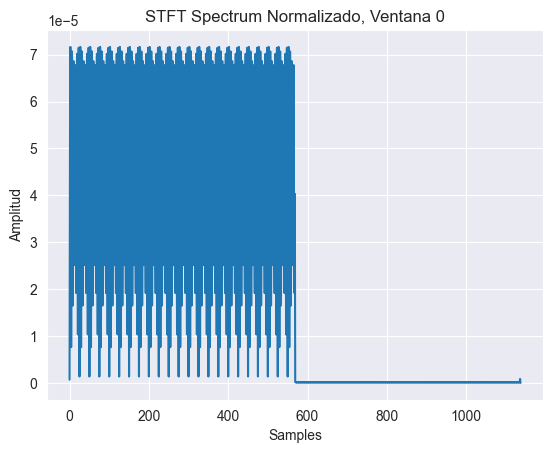

In [28]:
# plot con señal de prueba en frecuencia vs samples
n = len(z[0])
norm = n/2
plt.plot(np.abs(z[0])/norm)
plt.title('STFT Spectrum Normalizado, Ventana 0')
plt.ylabel('Amplitud')
plt.xlabel('Samples')
plt.show()

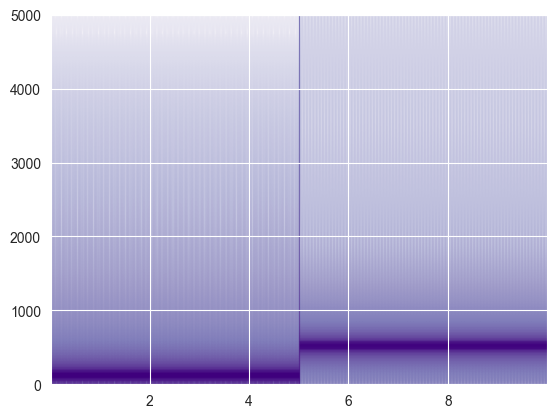

In [31]:
plt.specgram(x, cmap = 'Purples' ,Fs=10000)
plt.show()

## Cluster de time series